In [1]:
import numpy as np
import rasterio as rio
from rasterio.plot import show
from osgeo import gdal
from osgeo import osr

Data type is:  <class 'numpy.ndarray'>


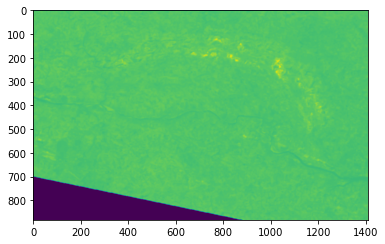

<AxesSubplot:>

In [2]:
array = np.load('numpy_array.npy') 
print("Data type is:", type(array))
show(array)

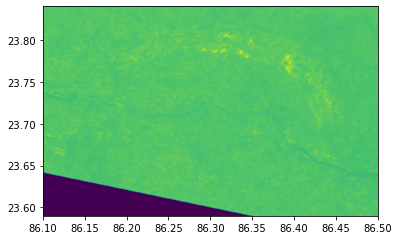

<AxesSubplot:>

In [3]:
refRas = rio.open('tir_wgs_clip.tif')
show(refRas)

In [4]:
def numpyGeocode_withRas(refRas, npArray, op_file_name):
    # Checking extension of the output file
    if op_file_name.endswith('.tif'):
        None
    else:
        op_file_name = op_file_name + '.tif'
        
    # Getting info for geocoding
    xmin, ymin, xmax, ymax = refRas.bounds
    nrows,ncols = np.shape(npArray)
    xres = (xmax-xmin)/float(ncols)
    yres = (ymax-ymin)/float(nrows)
    geotransform = xmin, xres, 0, ymax, 0, -yres 
    epsg_num = int(refRas.crs.data['init'].split(':')[1])
    
    # Applying the geocoding
    output_raster = gdal.GetDriverByName('GTiff').Create(op_file_name, ncols, nrows, 1, gdal.GDT_Float32)  
    output_raster.SetGeoTransform(geotransform)  # Specify its coordinates
    srs = osr.SpatialReference()                 # Establish its coordinate encoding
    srs.ImportFromEPSG(epsg_num)
    output_raster.SetProjection(srs.ExportToWkt()) 
    output_raster.GetRasterBand(1).WriteArray(npArray)
    output_raster.FlushCache()
    
    return rio.open(op_file_name)

Data type is:  <class 'rasterio.io.DatasetReader'>


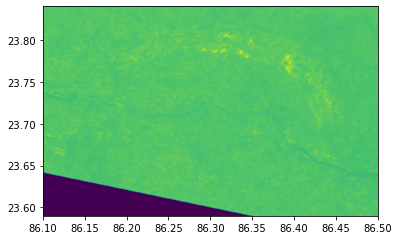

<AxesSubplot:>

In [5]:
op_raster = numpyGeocode_withRas(refRas=refRas, npArray=array, op_file_name='np_coded_rast.tif')
print("Data type is:", type(op_raster))
show(op_raster)